In [53]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits,ascii
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from scipy.constants import speed_of_light
import matplotlib.gridspec as gridspec
import treecorr

In [126]:
rp,wp,wp2 = np.loadtxt("wp_ELG_SGC_v7.dat",unpack=True)
s,e0,e2,e4 = np.loadtxt("xil_PIPANG_ELG.dat",unpack=True)
s2,e02,e22,e42 = np.loadtxt("xil_standard_ELG.dat",unpack=True)
theta,_,_,_,gammat= np.loadtxt("./gammat_DESxELG").T

In [115]:
cov = np.loadtxt("./Cov_ELG_SGC.dat")
err = np.sqrt(np.diag(cov))

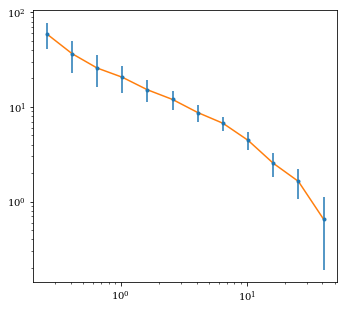

In [116]:
plt.rc('font',family='serif')
fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(1, 2)
gs.update(hspace=0 ,wspace=0.2)
ax = fig.add_subplot(gs[0])
ax.set_xscale('log')
ax.set_yscale('log')
plt.errorbar(rp,wp,fmt=".",yerr=err)
plt.loglog(rp,wp)

Text(0, 0.5, '$\\gamma_t$')

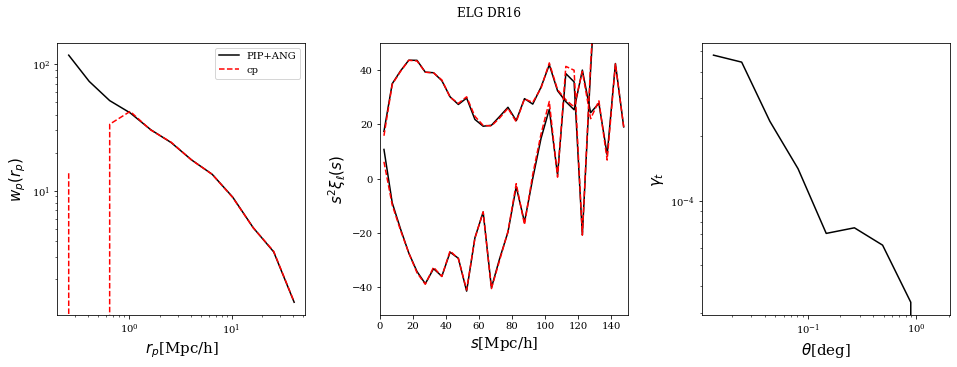

In [124]:
plt.rc('font',family='serif')
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 3)
gs.update(hspace=0 ,wspace=0.3)

ax = fig.add_subplot(gs[0])
#ax.set_xlim(0,180)
#ax.set_ylim(,125)
plt.suptitle('ELG DR16')

ax.loglog(rp,2*wp,label="PIP+ANG",color="black")
ax.loglog(rp,2*wp2,"--",label="cp",color="red")
ax.set_xlabel(r'$r_p$[Mpc/h]',fontsize=15)
ax.set_ylabel(r'$w_p(r_p)$',fontsize=15)
ax.legend()
ax = fig.add_subplot(gs[1])
ax.plot(s,e0*s**2,label="PIP+ANG",color="black")
ax.plot(s,e02*s**2,"--",label="cp",color="red")

ax.plot(s,e2*s**2,label="PIP+ANG",color="black")
ax.plot(s,e22*s**2,"--",label="cp",color="red")

ax.set_xlim(0,150)
ax.set_ylim(-50,50)

ax.set_xlabel(r'$s$[Mpc/h]',fontsize=15,)
ax.set_ylabel(r'$s^2\xi_{\ell}(s)$',fontsize=15)
ax = fig.add_subplot(gs[2])
plt.loglog(theta,gammat,color="black")
ax.set_xlabel(r'$\theta$[deg]',fontsize=15,)
ax.set_ylabel(r'$\gamma_t$',fontsize=15)


In [133]:
rp,wp,wp2 = np.loadtxt("wp_LRG_SGC_v7.dat",unpack=True)


s,e0,e2,e4 = np.loadtxt("xil_PIPANG_LRG.dat",unpack=True)
s2,e02,e22,e42 = np.loadtxt("xil_standard_LRG.dat",unpack=True)
theta,_,_,_,gammat= np.loadtxt("./gammat_DESxEBOSS_pass0").T


Text(0, 0.5, '$\\gamma_t$')

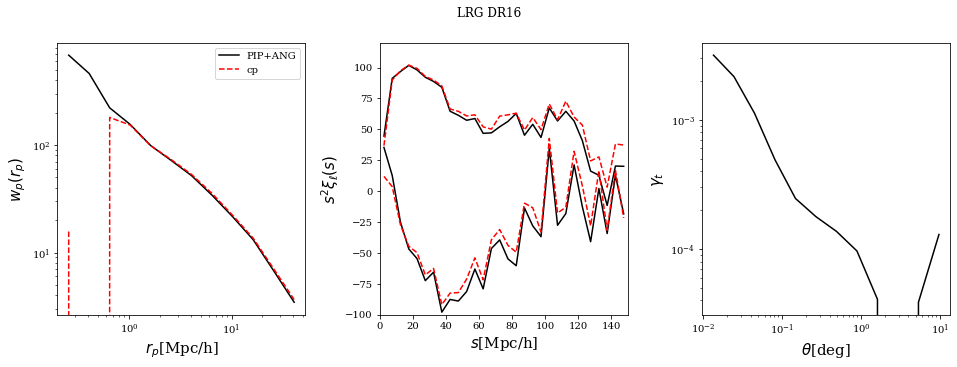

In [135]:
plt.rc('font',family='serif')
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 3)
gs.update(hspace=0 ,wspace=0.3)

ax = fig.add_subplot(gs[0])
#ax.set_xlim(0,180)
#ax.set_ylim(,125)
plt.suptitle('LRG DR16')

ax.loglog(rp,2*wp,label="PIP+ANG",color="black")
ax.loglog(rp,2*wp2,"--",label="cp",color="red")
ax.set_xlabel(r'$r_p$[Mpc/h]',fontsize=15)
ax.set_ylabel(r'$w_p(r_p)$',fontsize=15)
ax.legend()
ax = fig.add_subplot(gs[1])
ax.plot(s,e0*s**2,label="PIP+ANG",color="black")
ax.plot(s,e02*s**2,"--",label="cp",color="red")

ax.plot(s,e2*s**2,label="PIP+ANG",color="black")
ax.plot(s,e22*s**2,"--",label="cp",color="red")

ax.set_xlim(0,150)
ax.set_ylim(-100,120)

ax.set_xlabel(r'$s$[Mpc/h]',fontsize=15,)
ax.set_ylabel(r'$s^2\xi_{\ell}(s)$',fontsize=15)
ax = fig.add_subplot(gs[2])
plt.loglog(theta,gammat,color="black")
ax.set_xlabel(r'$\theta$[deg]',fontsize=15,)
ax.set_ylabel(r'$\gamma_t$',fontsize=15)

In [5]:
cosmo = FlatLambdaCDM(Om0= 0.3089,H0=100)
c = speed_of_light/1e3
ra = T['RA'].value
dec = T['DEC'].value
z = T['z'].value
vx = T['VX'].value
vy = T['VY'].value
vz = T['VZ'].value

cond = np.where((z>0.6)&(z<1.1))
ra = ra[cond]
dec = dec[cond]
z = z[cond] 
vx = vx[cond]
vy = vy[cond]
vz = vz[cond]
Dc = cosmo.comoving_distance(z).value



ra_min = ra.min()
ra_max = ra.max()
dec_min = dec.min()
dec_max = dec.max()

#x = np.column_stack([ra,dec,z])
indices  = np.random.choice(len(ra), size=int(len(ra)/10))
ra = ra[indices]
dec = dec[indices]
z = z[indices]
#ra = np.random.choice(ra,size = int(len(ra)/10.))
##dec = np.random.choice(dec,size = int(len(dec)/10.))
#z = np.random.choice(z,size = int(len(z)/10.))



#xc = Dc*np.cos(dec*np.pi/180)*np.cos(ra*np.pi/180)
#yc = Dc*np.cos(dec*np.pi/180)*np.sin(ra*np.pi/180)
#zc = Dc*np.sin(dec*np.pi/180)
#r = np.sqrt(xc**2 + yc**2 + zc**2)


#vr = (xc*vx + yc*vy + zc*vz)/r
##dz = (1+z)*vr/c
#z2 = z + dz
#print(vr)

X = np.random.uniform(ra_min,ra_max,10*len(ra))
Y = np.random.uniform(dec_min,dec_max,10*len(ra))
Z = np.random.choice(z,size = 10*len(ra))

In [40]:
s=np.random.binomial(n=10**8, p=0.05)

In [41]:
print(s)

5001499


In [6]:
print(len(ra))

85632


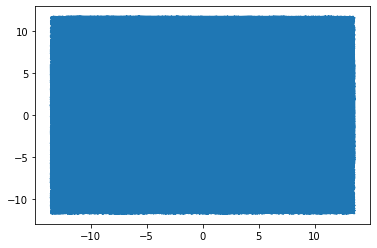

In [7]:
plt.plot(ra,dec)

In [17]:
theta,xi,xi2 = np.loadtxt("./gammat_DESxELG.dat").T
r,xi0,xi2b,xi4 = np.loadtxt("./xil_ELG_inDESfootprint.dat").T
r2,xi03,xi23,xi43 = np.loadtxt("./xil_uchuu_ELG_HOD_nos_redshift.dat").T
r22,xi02,xi22,xi42 = np.loadtxt("./xil_uchuu_ELG_HOD_withs_redshift.dat").T

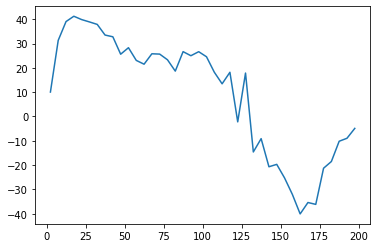

In [22]:
plt.plot(r2,xi02*r2**2)
#plt.plot(r,xi0*r**2)
#plt.plot(r,xi0*r**2)

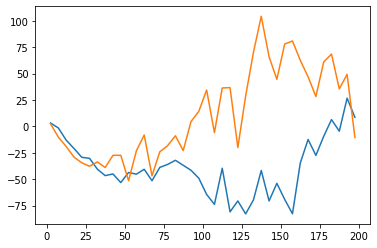

In [19]:
plt.plot(r,xi22*r**2)
plt.plot(r,xi2b*r**2)


In [4]:
theta,xi,xi2 = np.loadtxt("./gammat_DESxELG.dat").T
r,xi0,xi2b,xi4 = np.loadtxt("./xil_CMASS_inDESfootprint.dat").T
r2,xi02,xi22,xi42 = np.loadtxt("./xil_uchuu_CMASS_HOD.dat").T

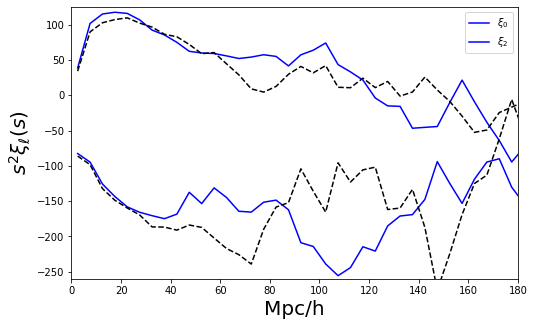

In [114]:

fig = plt.figure(figsize=(8,5))
gs = gridspec.GridSpec(1, 1)
gs.update(hspace=0 ,wspace=0.4)

ax = fig.add_subplot(gs[0])
ax.set_xlim(0,180)
ax.set_ylim(-260,125)

ax.plot(r,xi02*r**2,color="blue",label=r'$\xi_{0}$')
ax.plot(r,-100+xi22*r**2,color="blue",label=r'$\xi_{2}$')
#ax.plot(r,e4*r**2,label=r'$\xi_{2}$')

ax.plot(r2,xi0*r2**2,"--",color="black")
ax.plot(r2,-100+xi2b*r2**2,"--",color="black")
#ax.plot(rr,xi4*rr**2)

ax.set_xlabel(r'Mpc/h',fontsize=20)
ax.set_ylabel(r'$s^2\xi_{\ell}(s)$',fontsize=20)

#plt.loglog(theta,xi2,label="DES source z > 1.0")
#plt.loglog(theta,xi3,label="DES source z > 1.1")
ax.legend()
plt.savefig("2PCF_UCHUU_HODCMASS.pdf")

#plt.plot(r2,xi42*r2**2,label=r'$\xi_{0}$')


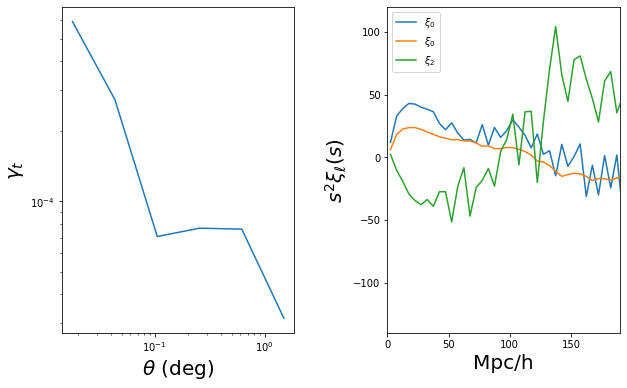

In [8]:

fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1, 2)
gs.update(hspace=0 ,wspace=0.4)

(


ax = fig.add_subplot(gs[0])

ax.loglog(theta,xi2)
ax.set_xlabel(r'$\theta$ (deg)',fontsize=20)
ax.set_ylabel(r'$\gamma_t$',fontsize=20)

ax = fig.add_subplot(gs[1])
ax.set_xlim(0,190)
ax.set_ylim(-140,120)

ax.plot(r,xi0*r**2,label=r'$\xi_{0}$')
ax.plot(r2,xi02*r2**2,label=r'$\xi_{0}$')

ax.plot(r,xi2b*r**2,label=r'$\xi_{2}$')
ax.set_xlabel(r'Mpc/h',fontsize=20)
ax.set_ylabel(r'$s^2\xi_{\ell}(s)$',fontsize=20)

#plt.loglog(theta,xi2,label="DES source z > 1.0")
#plt.loglog(theta,xi3,label="DES source z > 1.1")
ax.legend()
#plt.savefig("2PCF_CMASSDR12xDESY3.pdf")

In [32]:
𝑥c = 𝑟c cos (dec) cos (RA), (26)
𝑦c = 𝑟c cos (dec) sin (RA), (27)
𝑧c = 𝑟c sin (dec),

         VX        
-------------------
 233.44003295898438
     542.5302734375
 -414.2084045410156
-120.67776489257812
       607.59765625
   409.197021484375
 -261.7532958984375
                ...
  48.37040328979492
  109.5406723022461
  289.2640380859375
-135.91403198242188
  359.5794982910156
 -202.5922088623047
 157.12010192871094
Length = 425470 rows


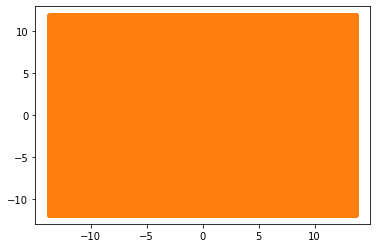

In [19]:
plt.scatter(ra,dec)
plt.scatter(X,Y)